In [86]:
#pip install openpyxl

In [54]:
# Import 3rd party libraries
import os
import json
import pandas as pd
import xml.etree.ElementTree as ET


TORONTO SUBWAY DATA (TTC)

In [83]:
#Pulling ttc subway files from 2018 onward TODO: Should we include back to 2014?
ttc_subway_files = [file for file in os.listdir() if 'ttc-subway-delay-data-20' in file]

dfs=[]

# Loop through the selected subway files, create individual dataframes for each sheet, and add dfs to a list 
for file in ttc_subway_files:
    sheet_names = pd.ExcelFile(file).sheet_names
    for sheet in sheet_names:
        temp_df = pd.read_excel(file, sheet_name= sheet)
        dfs.append(temp_df)
    
# Concatenate all individual DataFrames from the list into a single DataFrame
ttc_subway_df = pd.concat(dfs, ignore_index=True)

In [138]:
#ttc_subway_df.plot(x= "Date", y='Min Delay')
print(ttc_subway_df.info())
ttc_subway_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       108004 non-null  datetime64[ns]
 1   Time       108004 non-null  object        
 2   Day        108004 non-null  object        
 3   Station    108004 non-null  object        
 4   Code       108004 non-null  object        
 5   Min Delay  108004 non-null  int64         
 6   Min Gap    108004 non-null  int64         
 7   Bound      79240 non-null   object        
 8   Line       107675 non-null  object        
 9   Vehicle    108004 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 8.2+ MB
None


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


<Axes: xlabel='Date'>

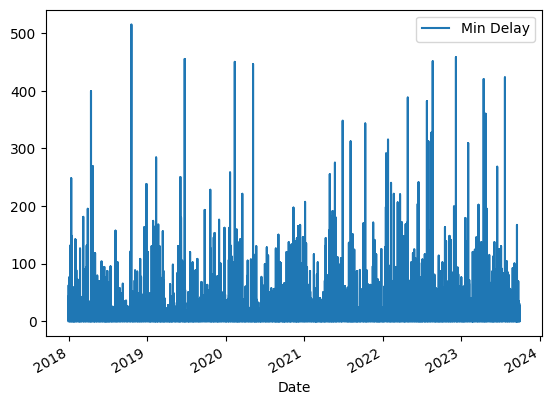

In [145]:
ttc_subway_df.plot(x= "Date", y='Min Delay')

TORONTO BUS DATA (TTC)

In [140]:
#TORONTO BUS
ttc_bus_files= ['ttc-bus-delay-data-2018.xlsx','ttc-bus-delay-data-2019.xlsx', 
                 'ttc-bus-delay-data-2020.xlsx','ttc-bus-delay-data-2021.xlsx',
                 'ttc-bus-delay-data-2022.xlsx','ttc-bus-delay-data-2023.xlsx']

# Loop through the selected subway files, create individual dataframes, and add dfs to a list 
for file in ttc_bus_files:
    sheet_names = pd.ExcelFile(file).sheet_names
    for sheet in sheet_names:
        temp_df = pd.read_excel(file, sheet_name= sheet, engine='openpyxl')
        dfs.append(temp_df)
    
# Concatenate all individual DataFrames from the list into a single DataFrame
ttc_bus_df = pd.concat(dfs, ignore_index=True)
ttc_bus_df.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Min Delay,Incident ID,Delay,Gap,Date,Line,Bound,Unnamed: 10
0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [141]:
#Cleaning DataFrame
ttc_bus_df['Report Date'].fillna(ttc_bus_df['Date'], inplace=True)
ttc_bus_df['Min Gap'].fillna(ttc_bus_df['Gap'], inplace=True)
ttc_bus_df['Min Delay'].fillna(ttc_bus_df['Delay'], inplace=True)
ttc_bus_df[' Min Delay'].fillna(ttc_bus_df['Delay'], inplace=True)
ttc_bus_df['Route'].fillna(ttc_bus_df['Line'], inplace=True)

In [142]:
ttc_bus_df.drop(columns=['Date', 'Incident ID', ' Min Delay', 'Delay', 'Gap', 'Line', 'Bound', 'Unnamed: 10'], inplace = True)

In [143]:
# ttc_bus_df[ttc_bus_df['Unnamed: 10'].notnull() == True]
print(ttc_bus_df.info())
ttc_bus_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880760 entries, 0 to 1880759
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Report Date  datetime64[ns]
 1   Route        object        
 2   Time         object        
 3   Day          object        
 4   Location     object        
 5   Incident     object        
 6   Min Delay    float64       
 7   Min Gap      float64       
 8   Direction    object        
 9   Vehicle      float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 143.5+ MB
None


,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0


<Axes: xlabel='Report Date'>

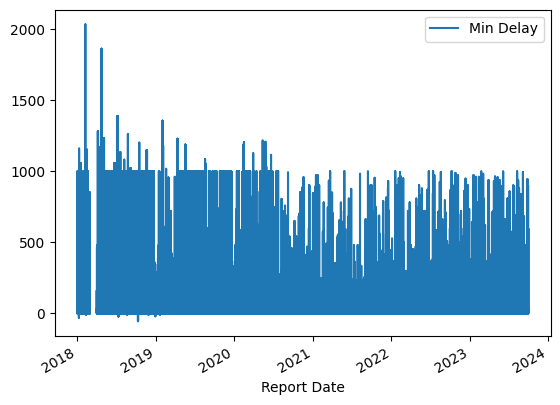

In [147]:
ttc_bus_df.plot(x= "Report Date", y='Min Delay')
#This graph looks suspicious

OTTAWA BUS DATA (OC TRANSPORT)

In [38]:
#OTTAWA BUS??
#Import OCTransport data- Ottawa
oct_file = json.load(open('octranspo_output.json', encoding='utf8'))
oct_file
# oct_df = pd.DataFrame(oct_file)
# oct_df.head()

{'6941': {'GetRouteSummaryForStopResult': {'StopNo': '4055',
   'Error': '',
   'StopDescription': 'CHESTERTON / ASSINIBOINE',
   'Routes': {'Route': {'RouteNo': '111',
     'RouteHeading': 'Baseline',
     'DirectionID': 1,
     'Direction': '',
     'Trips': {'Trip': [{'Longitude': '-75.72068887007863',
        'Latitude': '45.35138501619038',
        'GPSSpeed': '18',
        'TripDestination': 'Baseline',
        'TripStartTime': '14:43',
        'AdjustedScheduleTime': '1',
        'AdjustmentAge': '0.93',
        'LastTripOfSchedule': False,
        'BusType': ''},
       {'Longitude': '-75.7063585478684',
        'Latitude': '45.375254269303944',
        'GPSSpeed': '12',
        'TripDestination': 'Baseline',
        'TripStartTime': '14:58',
        'AdjustedScheduleTime': '14',
        'AdjustmentAge': '0.65',
        'LastTripOfSchedule': False,
        'BusType': ''},
       {'Longitude': '',
        'Latitude': '',
        'GPSSpeed': '',
        'TripDestination': 'Baseli

In [40]:
oct_file['7197']['GetRouteSummaryForStopResult']

{'StopNo': '4055',
 'Error': '',
 'StopDescription': 'CHESTERTON / ASSINIBOINE',
 'Routes': {'Route': {'RouteNo': '111',
   'RouteHeading': 'Baseline',
   'DirectionID': 1,
   'Direction': '',
   'Trips': {'Trip': [{'Longitude': '-75.70770497475901',
      'Latitude': '45.37463495808263',
      'GPSSpeed': '15',
      'TripDestination': 'Baseline',
      'TripStartTime': '14:58',
      'AdjustedScheduleTime': '14',
      'AdjustmentAge': '1.17',
      'LastTripOfSchedule': False,
      'BusType': ''},
     {'Longitude': '',
      'Latitude': '',
      'GPSSpeed': '',
      'TripDestination': 'Baseline',
      'TripStartTime': '15:12',
      'AdjustedScheduleTime': '27',
      'AdjustmentAge': '-1',
      'LastTripOfSchedule': False,
      'BusType': ''}]}}}}

VANCOUVER BUS DATA (TRANSLINK)

In [69]:
#VANCOUVER
tl_file= 'translink_data.xml'

# Parse the XML file
tree = ET.parse(tl_file)
root = tree.getroot()

# Extract data from XML and create a list of dictionaries
tl_bus_data_list = []
for item in root.findall('Bus'):
    data = {}
    data['VehicleNo'] = item.find('VehicleNo').text
    data['TripId'] = item.find('TripId').text
    data['RouteNo'] = item.find('RouteNo').text
    data['Direction'] = item.find('Direction').text
    data['Destination'] = item.find('Destination').text
    data['Pattern'] = item.find('Pattern').text
    data['Latitude'] = item.find('Latitude').text
    data['Longitude'] = item.find('Longitude').text
    data['RecordedTime'] = item.find('RecordedTime').text
    
    tl_bus_data_list.append(data)

# Create a DataFrame from the list of dictionaries
tl_bus_df = pd.DataFrame(tl_bus_data_list)
tl_bus_df
#TODO: times but no dates...confused on how to get delay data from this

,VehicleNo,TripId,RouteNo,Direction,Destination,Pattern,Latitude,Longitude,RecordedTime
0,12001,13539101,049,WEST,UBC,WB1,49.222067,-123.024783,10:38:27 am
1,12003,13590009,049,EAST,METROTOWN STN,EB1,49.247100,-123.232083,10:38:48 am
2,12007,13590007,049,EAST,METROTOWN STN,EB1,49.226467,-123.005067,10:34:41 am
3,12008,13539007,049,EAST,METROTOWN STN,EB1,49.225950,-123.112367,10:38:45 am
4,12010,13590006,049,EAST,METROTOWN STN,EB1,49.226900,-123.006117,10:24:59 am
...,...,...,...,...,...,...,...,...,...
777,9784,13537178,028,NORTH,PHIBBS EXCH,N1,49.236233,-123.027667,10:38:22 am
778,9786,13556614,230,SOUTH,LONSDALE QUAY,S1,49.344833,-123.073733,10:38:14 am
779,9787,13556791,232,EAST,PHIBBS EXCH,E1,49.312200,-123.040417,10:38:56 am
780,9788,13556543,230,NORTH,UPPER LONSDALE,N1,49.320950,-123.072217,10:39:08 am
